In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

url = "https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment1/Ruter_data.csv"
df = pd.read_csv(url, sep=";")

In [7]:
#The first feature I will look at is based on the Passasjerer_Ombord column. It is slightly unclear what this
#column actually represents. Based on the name of the column, it represents the number of passengers on the bus,
#while the documentation of the set claims it represents the actual capacity of the vehicle, compared to the planned 
#capacity in Kjøretøy_Kapasitet. The latter makes more sense as the column has negative values, it could be because of
#an error, but I will base this feature on the assumption that it represents actual capacity, where a negative number
#indicates the bus is over capacity. 

#With this in mind, I will first create a new column called "Over_Capacity", which will have a value of either 1 
#(True) or 0 (False)

conditions = [
    (df["Passasjerer_Ombord"] >= 0.0),
    (df["Passasjerer_Ombord"] < 0.0)
]

values = [0,1]

df["Over_Capacity"] = np.select(conditions, values)


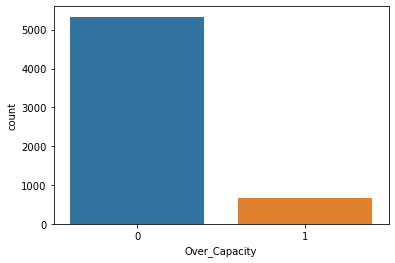

In [10]:
#With this I can make a simple bar chart that can indicate how often a bus is over capacity

sns.countplot(x="Over_Capacity", data=df);

In [13]:
#Next, I'm going to look at the frequency of trips in the months given in the dataset. 
#First, I have to make sure I get the right format, so that when I extract the month from the date, I don't get the 
#day instead
df["Dato"] = pd.to_datetime(df["Dato"], format="%d/%m/%Y")
#Then I can create a separate column representing just the month.
df["Month"] = pd.DatetimeIndex(df["Dato"]).month

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Over_Capacity,Month
0,15006-2020-08-10T10:24:00+02:00,2020-08-10,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5,0,8
1,15002-2020-08-15T12:54:00+02:00,2020-08-15,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5,0,8
2,15004-2020-08-03T09:54:00+02:00,2020-08-03,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6,0,8
3,15003-2020-07-27T13:00:00+02:00,2020-07-27,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10,0,7
4,15002-2020-08-27T07:15:00+02:00,2020-08-27,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10,0,8
5,3110-2020-08-01T16:16:00+02:00,2020-08-01,Oslo,Nordøst,Bjerke,Veitvet (mot Kalbakken),Rødtvet (mot Kalbakken),Lokal,Oslo,31,0,17:22:56,17:23:23,17:16:00,17:16:00,151,8,0,8
6,15010-2020-07-28T13:09:00+02:00,2020-07-28,Viken,Vest,Bærum,Nedre Toppenhaug,Øvre Toppenhaug,Lokal,Viken,150,0,13:19:00,13:19:05,13:17:00,13:17:00,112,1,0,7
7,15003-2020-07-27T06:18:00+02:00,2020-07-27,Oslo,Indre By,St.Hanshaugen,Hammersborggata (ved Storgata retning vest),St. Olavs plass (mot Frederiks gate),Lokal,Viken,150,1,06:20:24,06:20:29,06:20:00,06:20:00,112,-1,1,7
8,21002-2020-08-16T14:33:00+02:00,2020-08-16,Viken,Vest,Bærum,Stein gård,Knabberudveien,Lokal,Viken,150,1,15:10:12,15:10:34,15:09:00,15:09:00,112,2,0,8
9,15002-2020-08-13T18:09:00+02:00,2020-08-13,Viken,Vest,Bærum,Bekkestua bussterminal (Plattform C),Stabekk skole,Lokal,Viken,150,0,18:37:41,18:38:19,18:29:00,18:29:00,112,4,0,8


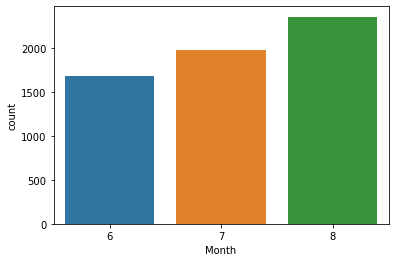

In [14]:
sns.countplot(x="Month", data=df);

In [15]:
#Now I want to group based on the maximum capacity of the buses, indicating the size of the bus, e.g. "Small",
#"Medium" and "Large". One way to do this is to find the highest and lowest values within the column. 

min = df.Kjøretøy_Kapasitet.min()
max = df.Kjøretøy_Kapasitet.max()
print(min,max)

33 151


In [16]:
#If I want to divide the range between the minimum and maximum values, I'll have to find the range. 
range = (max-min)
print(range)

118


In [19]:
#I can now divide into three (almost) equal parts, and make these into the size categories.

conditions = [
    (df["Kjøretøy_Kapasitet"] < 72.0),
    (df["Kjøretøy_Kapasitet"] >= 72.0) & (df["Kjøretøy_Kapasitet"] < 111.0),
    (df["Kjøretøy_Kapasitet"] >= 111.0)
]

values = ["Small", "Medium", "Large"]
df["Bus_Size"] = np.select(conditions, values)

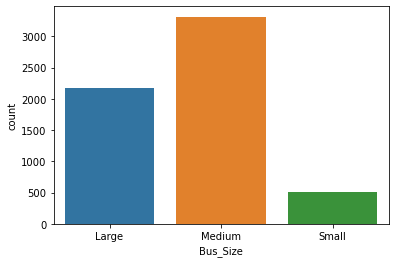

In [20]:
#Now I can see the distribution of the different bus sizes
sns.countplot(x="Bus_Size", data=df);

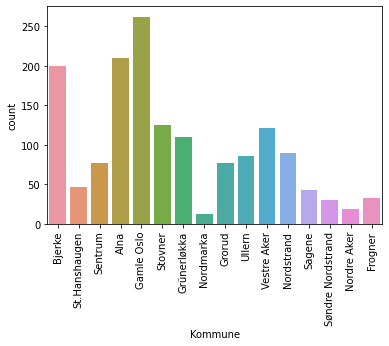

In [22]:
#Next, I'll look at which areas in which county has the most rides, using features already available 
#one for each county

sns.countplot(x="Kommune", data=df[df["Fylke"].str.contains("Viken")==False]);
plt.xticks(rotation=90);

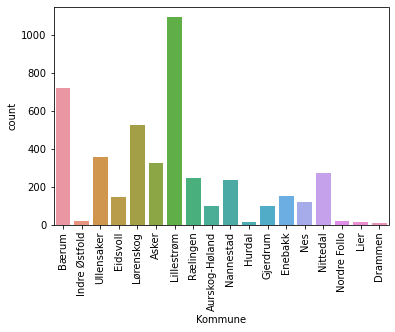

In [23]:
sns.countplot(x="Kommune", data=df[df["Fylke"].str.contains("Oslo")==False])
plt.xticks(rotation=90);

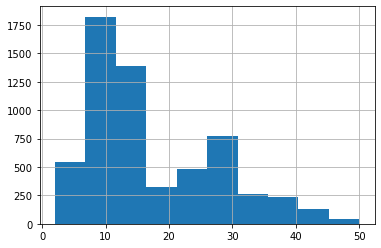

In [27]:
#Finally, I will look at the length of the names of the stops in the dataset. 
df["Stop_Chars"] = df["Holdeplass_Fra"].str.len()
df["Stop_Chars"].hist();